In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nRowsRead = 1000
df = pd.read_csv('abortion.csv', delimiter=';', encoding = "ISO-8859-1", nrows = nRowsRead)
df.dataframeName = 'abortion.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 152 rows and 3 columns


In [3]:
df.head()

,period,age_of_woman,abortion_rate
0,2000,11-14,0.7
1,2000,15-19,23.1
2,2000,20-24,35.7
3,2000,25-29,24.5
4,2000,30-34,16.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 3 columns):
period           152 non-null int64
age_of_woman     152 non-null object
abortion_rate    152 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.6+ KB


In [5]:
df.isnull().any()

period           False
age_of_woman     False
abortion_rate    False
dtype: bool

In [6]:
df.corr()

,period,abortion_rate
period,1.000000,-0.174178
abortion_rate,-0.174178,1.000000


In [7]:
df.describe()

,period,abortion_rate
count,152.000000,152.000000
mean,2009.006579,13.440132
std,5.489902,11.453333
min,2000.000000,0.200000
25%,2004.000000,2.850000
50%,2009.000000,11.000000
75%,2014.000000,23.025000
max,2018.000000,41.100000


In [15]:
df.abortion_rate.value_counts().sort_index()

0.2      2
0.3     15
0.4      8
0.5      1
0.6      3
0.7      7
0.9      2
3.5      1
3.6      1
3.7      2
3.8      3
3.9      1
4.0      2
4.1      5
4.3      2
4.4      2
8.4      1
9.2      1
9.4      1
9.7      1
9.9      1
10.0     1
10.1     1
10.3     2
10.4     2
10.5     1
10.6     2
10.8     1
10.9     3
11.0     2
        ..
24.5     1
24.6     1
24.7     1
25.2     1
25.4     2
25.6     1
25.8     1
25.9     2
26.1     1
26.2     1
26.3     1
26.4     2
26.5     1
26.7     1
26.8     1
27.9     1
28.1     1
29.5     1
33.7     1
34.4     1
35.7     1
36.2     1
36.5     1
36.6     1
36.9     1
37.3     1
37.6     1
38.8     1
39.1     1
41.1     1
Name: abortion_rate, Length: 95, dtype: int64

In [34]:
(df['abortion_rate'] == 41.1).value_counts() #frequency of occurence

False    151
True       1
Name: abortion_rate, dtype: int64

In [45]:
df.head(30)

,period,age_of_woman,abortion_rate
0,2000,11-14,0.7
1,2000,15-19,23.1
2,2000,20-24,35.7
3,2000,25-29,24.5
4,2000,30-34,16.4
5,2000,35-39,11.4
6,2000,40-44,4.1
7,2000,45 and over,0.3
8,2001,11-14,0.6
9,2001,15-19,23.8


In [63]:
df[df.period == 2000].abortion_rate #occurrence

0     0.7
1    23.1
2    35.7
3    24.5
4    16.4
5    11.4
6     4.1
7     0.3
Name: abortion_rate, dtype: float64

In [69]:
s = df.abortion_rate.min()
df[df.abortion_rate == s].period


128    2016
144    2018
Name: period, dtype: int64

In [70]:
s = df.abortion_rate.max()
df[df.abortion_rate == s].period

26    2003
Name: period, dtype: int64

In [71]:
s = df.abortion_rate.mean()
s

13.44013157894737

(array([53.,  4., 24., 15., 11., 15., 17.,  1.,  7.,  5.]),
 array([ 0.2 ,  4.29,  8.38, 12.47, 16.56, 20.65, 24.74, 28.83, 32.92,
        37.01, 41.1 ]),
 <a list of 10 Patch objects>)

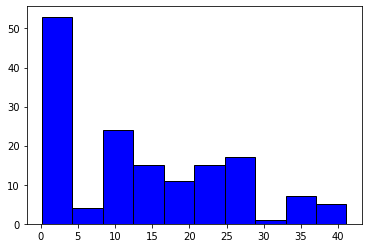

In [76]:
plt.hist(df['abortion_rate'], color = 'blue', edgecolor = 'black',
         bins = 10)

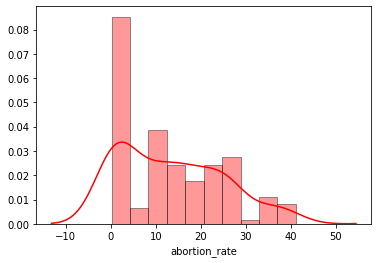

In [82]:
sns.distplot(df['abortion_rate'], bins = 10, color = 'red', hist = True,   hist_kws={'edgecolor':'black'})

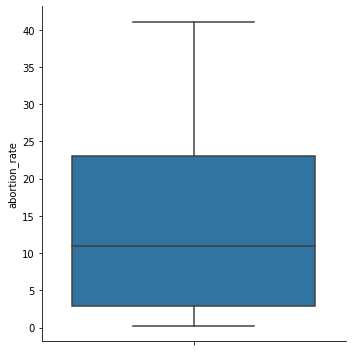

In [84]:
sns.catplot(y = 'abortion_rate', data = df, kind = 'box')

In [95]:
x2 = df.abortion_rate.mean()

In [100]:
var2= df.abortion_rate.var()

In [87]:
df.abortion_rate.std()

11.453333242627595

In [96]:
x1 = df.period.mean()

In [89]:
df.period.std()

5.489902483514105

In [92]:
n1 = len(df.period)
n1

152

In [93]:
n2 = len(df.abortion_rate)

In [98]:
diff = x1 - x2

In [99]:
var1= df.period.var()

In [101]:
pool_std = (n1*var1+ n2*var2)/n1+n2

In [102]:
import math

In [103]:
st = math.sqrt(pool_std)

In [104]:
eff = diff/st

In [105]:
eff     # effect of size

112.73885232442174